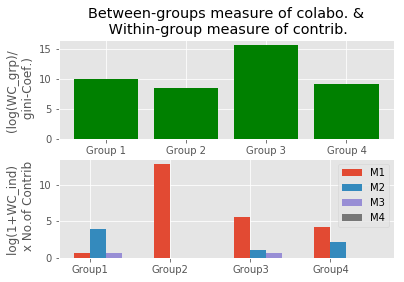

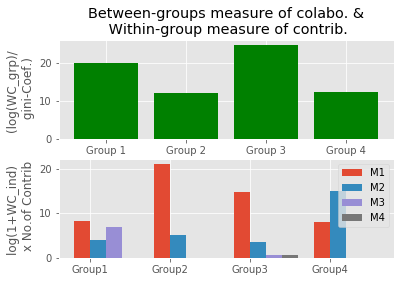

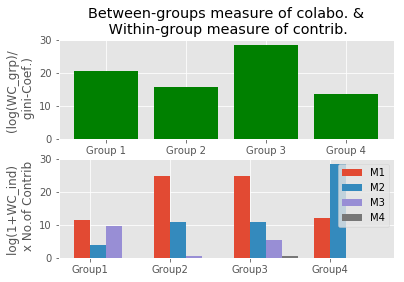

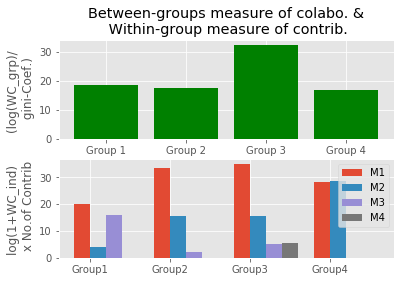

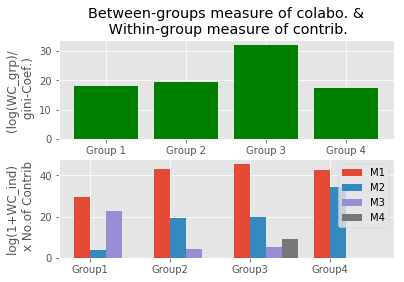

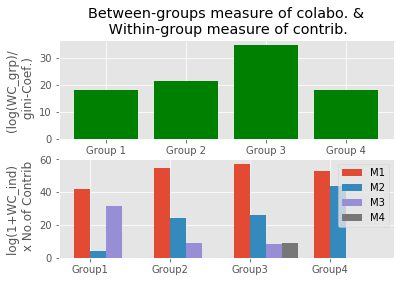

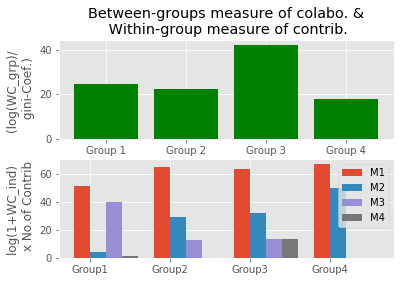

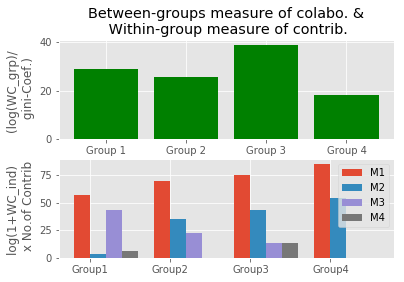

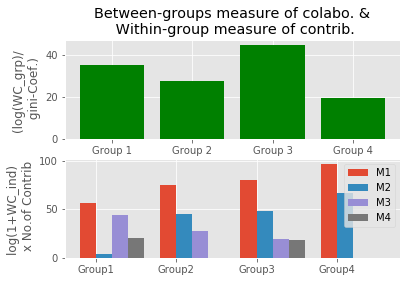

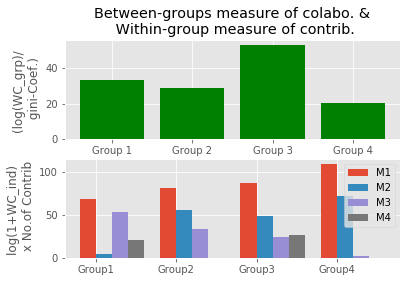

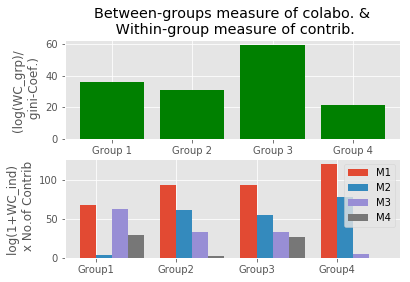

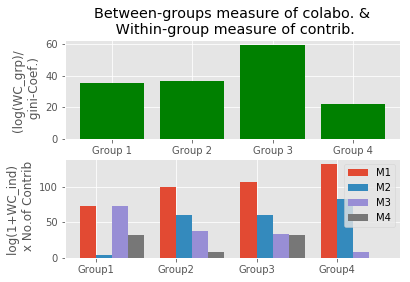

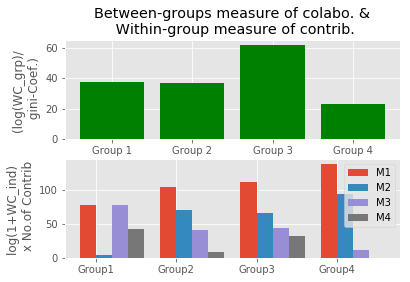

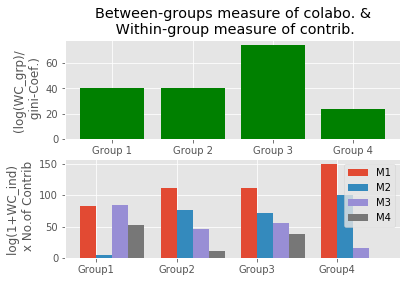

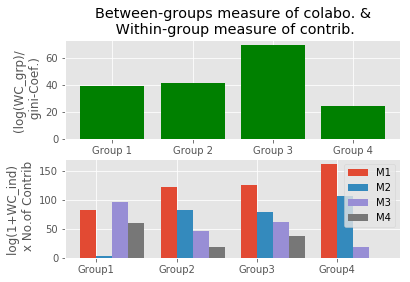

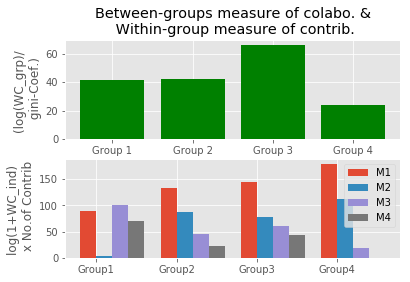

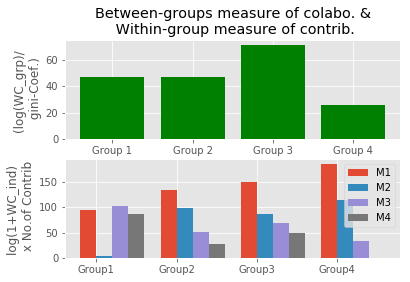

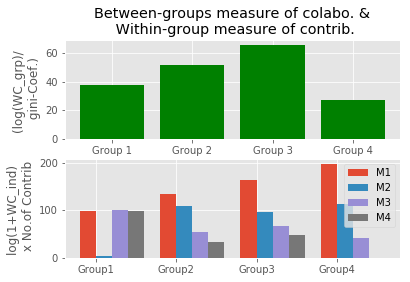

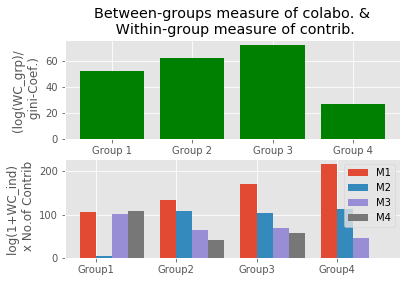

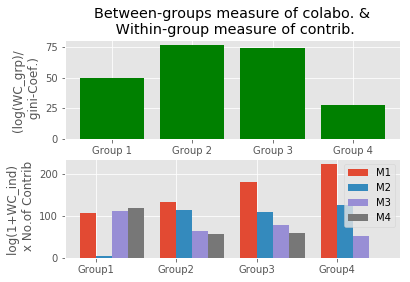

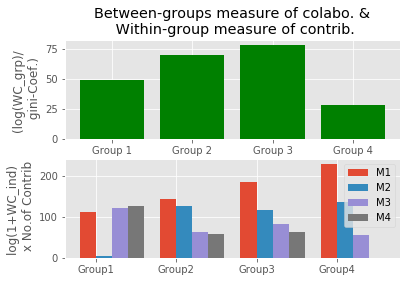

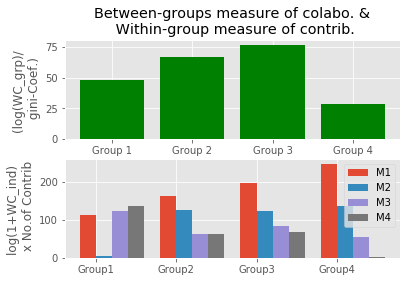

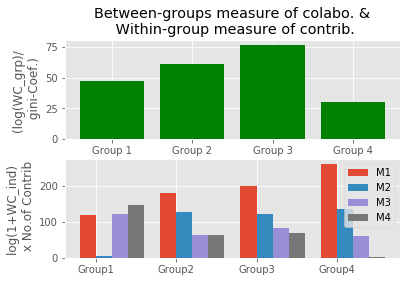

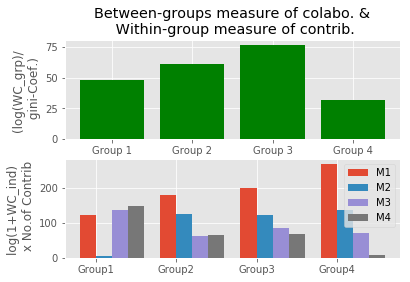

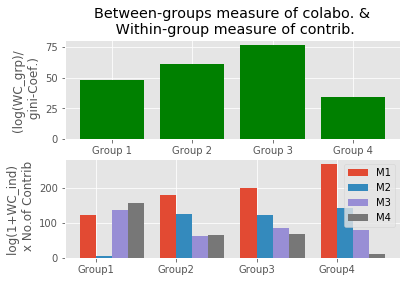

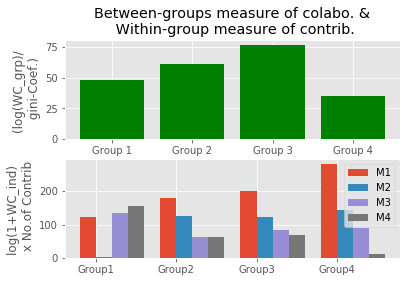

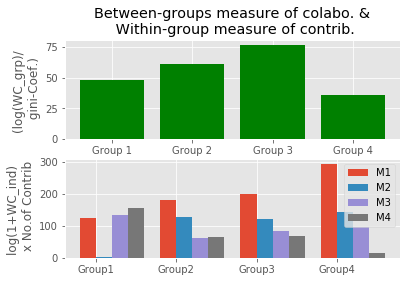

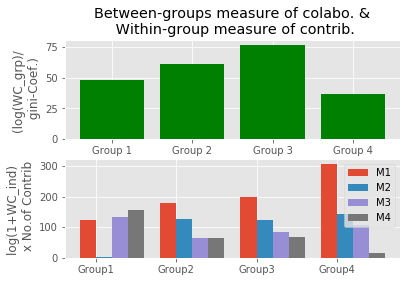

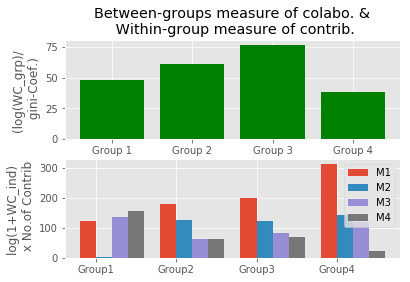

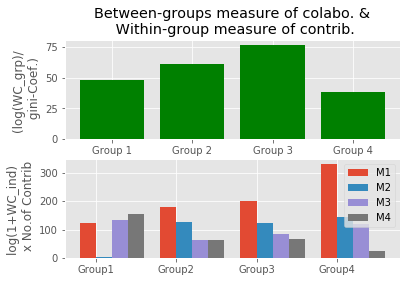

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import animation
from mpl_toolkits import mplot3d
%matplotlib inline
plt.style.use('ggplot')
from pylab import figure, subplot, hist, xlim, show

#Getting groups interaction data from excel  to panda dataframe

group1_1 = pd.read_excel('C:\Users\User\Desktop\Study3\StudyData1\group1_1.xlsx')
group2_1 = pd.read_excel('C:\Users\User\Desktop\Study3\StudyData1\group2_1.xlsx')
group3_1 = pd.read_excel('C:\Users\User\Desktop\Study3\StudyData1\group6_1.xlsx')
group4_1 = pd.read_excel('C:\Users\User\Desktop\Study3\StudyData1\group3_1.xlsx')

#Function to determine measure of symmetry of contribution within groups
#This function takes two arguments 1. The group JPS interaction data and 
#2. The list of members in the group. It returns Gini-coef measure of contribution with group

def getGiniCoef(group, memList):
    #for a group of 4 members
    #We capture contribution of each of the members
    g_m1=group.loc[group['username'] == memList[0]]
    g_m2=group.loc[group['username'] == memList[1]]
    g_m3=group.loc[group['username'] == memList[2]]
    g_m4=group.loc[group['username'] == memList[3]]
    
    #Here we select the word count of each contribution within group and convert to a list
    gWC = group['Word Count'].tolist()
    
    #We get the sum word count in all contributions
    wordCount = sum(gWC)
    #Total wordcount in all contributions divided by number of members in group
    #wordCount = wordCount/4
    
    #The number of text contributions made by each member of the group
    contM1 =g_m1.shape[0]
    contM2 =g_m2.shape[0]
    contM3 =g_m3.shape[0]
    contM4 =g_m4.shape[0]
    
    #A list of contribution count by each member of the group
    grpWC= [contM1, contM2, contM3, contM4]
    
    #Mean of members contrubtion
    grpMean = np.mean(grpWC)
    summ=0
    #Caclute gini coeficient measure of symmetry of contributions within group
    for i in grpWC:
        n=grpWC.index(i)+1    
        for j in grpWC[n:]:
            summ+=abs(i-j)
            
    GiniCoefMeasure = summ/(2*(len(grpWC)**2)*grpMean)
    
    #As gini-coefficient measure range from 1-0 with 0 as perfect symmetry and 1 and total
    #assymetry. And our model hypothesize that the more symmetrical the better collaboration
    #within group. Therefore giniCoefficient measure is inversely proportional to level of
    #collaboration. Here we use the total number of wordcount divided by number of individuals
    #in the group as a constant of proportionality, as this stands in proxy for a mesure of 
    #how much information is shared within group.
    
    colabMeasure = (np.log(1+wordCount))/GiniCoefMeasure
    
    return  colabMeasure
def withinGroupIndivCon(g, mList):
    g_m1=g.loc[g['username'] == mList[0]]
    g_m2=g.loc[g['username'] == mList[1]]
    g_m3=g.loc[g['username'] == mList[2]]
    g_m4=g.loc[g['username'] == mList[3]]
    
    m1WC = g_m1['Word Count'].tolist()
    m2WC = g_m2['Word Count'].tolist()
    m3WC = g_m3['Word Count'].tolist()
    m4WC = g_m4['Word Count'].tolist()
    
    #gWC = g['Word Count'].tolist()
    m1WCT = sum(m1WC)
    m2WCT = sum(m2WC)
    m3WCT = sum(m3WC)
    m4WCT = sum(m4WC)
      
    m1WCT = np.log(1+m1WCT)
    m2WCT = np.log(1+m2WCT)
    m3WCT = np.log(1+m3WCT)
    m4WCT = np.log(1+m4WCT)
    contM1 =g_m1.shape[0]
    contM2 =g_m2.shape[0]
    contM3 =g_m3.shape[0]
    contM4 =g_m4.shape[0]
    
    contM1 = (contM1*m1WCT)
    contM2 = (contM2*m2WCT)
    contM3 = (contM3*m3WCT)
    contM4 = (contM4*m4WCT)
    
    contDist=[contM1, contM2, contM3, contM4]
    
    return contDist


def selectFromGroup(gr, num):
    grpO = gr
    grpDataL=gr.shape[0]  #get the number of rows in group data
    
    if num<grpDataL:  #check if 'num' is not more that the number of rows in groupData
        grp=gr.iloc[0:num] # get first 'num' rows of dataframe
        
        return grp
    else:
        return grpO
        

#To simulate the collaboration measure at intervals during realtime JPS interaction within group
#we capture data of interaction in bits and evaluate and visualize level of conllaboration.
#This is updated at intervals of 5 sencond until complete data of all group has been collected
#and evaluated.
#This function two functions: 1 list of groups, and 2. the number of data row to capture for 
#each group at time t.

def plotGroupAtTimeIntevals(grList,allGpMem, num):
    #Capture row lenght of data of each group into list
    l = [grList[0].shape[0], grList[1].shape[0], grList[2].shape[0], grList[3].shape[0]]
    
    #Get the row lenght of group with maximum row
    maxL = max(l)
    for i in xrange(num ,maxL, num):
        ColabMeasure = getGiniCoef(selectFromGroup(grList[0], i), allGpMem[0]) 
        ColabMeasure2= getGiniCoef(selectFromGroup(grList[1], i), allGpMem[1])
        ColabMeasure3= getGiniCoef(selectFromGroup(grList[2], i), allGpMem[2])
        ColabMeasure4= getGiniCoef(selectFromGroup(grList[3], i), allGpMem[3])
        

        x = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
        grpList=[ColabMeasure, ColabMeasure2, ColabMeasure3, ColabMeasure4]
        x_pos = [j for j, _ in enumerate(grpList)]
        
        
        #plt.savefig('C:/Users/User/Desktop/Study3/StudyData1/betweenGroup_t'+str(i)+'jpg')
        
        g1Mem=withinGroupIndivCon(selectFromGroup(grList[0],i), allGpMem[0])
        g2Mem=withinGroupIndivCon(selectFromGroup(grList[1],i), allGpMem[1])
        g3Mem=withinGroupIndivCon(selectFromGroup(grList[2],i), allGpMem[2])
        g4Mem=withinGroupIndivCon(selectFromGroup(grList[3],i), allGpMem[3])
    
        allMem1=[g1Mem[0], g2Mem[0], g3Mem[0], g4Mem[0]]
        allMem2=[g1Mem[1], g2Mem[1], g3Mem[1], g4Mem[1]]
        allMem3=[g1Mem[2], g2Mem[2], g3Mem[2], g4Mem[2]]
        allMem4=[g1Mem[3], g2Mem[3], g3Mem[3], g4Mem[3]]
    
        plotList = [allMem1, allMem2, allMem3, allMem4]
        
        N = 4
        ind = np.arange(N) 
        width = 0.2  
        
        plt.subplot(2, 1, 1) 
        plt.bar(x_pos, grpList, color='green')
        plt.xlabel("Groups")
        plt.ylabel("(log(WC_grp)/ \n gini-Coef.)")
        plt.title("Between-groups measure of colabo. &\n Within-group measure of contrib.")
        plt.xticks(x_pos, x)
        
        plt.subplot(2, 1, 2)
        plt.bar(ind, plotList[0], width, label='M1')
        plt.bar(ind + width, plotList[1], width, label='M2')
        plt.bar(ind + width+width, plotList[2], width,label='M3')
        plt.bar(ind + width+width+width, plotList[3], width,label='M4')

        plt.ylabel('log(1+WC_ind) \n x No.of Contrib')
        #plt.title('Within Group visualization of individuals contribution')

        plt.xticks(ind + width / 2, ('Group1', 'Group2', 'Group3', 'Group4'))
        plt.legend(loc='best')
        
        
        plt.show()
        time.sleep(5)


#MemberList in groups 1-4
m1List = ['Lucas', 'charis', 'Ranco', 'United']
m2List = ['Carbon', 'oluwalonimi', 'smith', 'Arrival']
m3List = ['Epigha', 'Beowulf', 'Anonymous1', 'cls603']
m4List = ['smart', 'Swift', 'jade', 'the unknown']

all4gMem = [m1List, m2List, m3List, m4List]
allGrps = [group1_1, group2_1, group3_1, group4_1]

plotGroupAtTimeIntevals(allGrps,all4gMem, 4)

